<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(hh_data.head(3))
display(hh_data.tail(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
display(hh_data.info())
display(hh_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

(44744, 12)

5. Выведите основную статистическую информацию о столбцах.


In [5]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def education(st):
    edu_list = 'Неоконченное высшее Высшее образование Среднее специальное Среднее образование'
    ls = st.split()[0:2]
    ls = ' '.join(ls)
    if ls in edu_list:
        if 'образование' in ls:
            return ls[:-12]
        else:
            return ls
    else:
        return None


hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education)
hh_data = hh_data.drop('Образование и ВУЗ', axis = 1)
print('Средний уровень образования имеют', hh_data['Образование'].value_counts().loc['Среднее'], 'соискателей')


Средний уровень образования имеют 559 соискателей


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
def age(stn):
    lsn = stn.split(',')[0:2]
    return int(lsn[-1].split()[0])


def paul(gn):
    g = gn.split(',')[0]
    if 'Мужчина' in g:
        return 'М'
    elif 'Женщина' in g:
        return 'Ж'
    else:
        return None


hh_data['Возраст'] = hh_data['Пол, возраст'].apply(age)
print('Средний возраст соискателей составляет',
      round(hh_data['Возраст'].mean(), 1), 'года')


hh_data['Пол'] = hh_data['Пол, возраст'].apply(paul)
percent = round(hh_data['Пол'].value_counts(normalize=True).loc['Ж'], 4) * 100
print(f'В данных представлено {percent}% женских резюме')

hh_data = hh_data.drop('Пол, возраст', axis=1)


Средний возраст соискателей составляет 32.2 года
В данных представлено 19.07% женских резюме


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def exp(ans):
    if ans is np.nan or ans == 'Не указано':
        return np.nan
    year_list = ["год", "года", "лет"]
    month_list = ["месяца", "месяцев", "месяц"]
    year = 0
    month = 0
    ans_splited = ans.split(' ')[2: 7]
    for i, j in enumerate(ans_splited):
        if j in year_list:
            year = int(ans_splited[i - 1])
        if j in month_list:
            month = int(ans_splited[i - 1])
    return ((year * 12) + month)


hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(exp)
print('Медианный орыт работы равен', int(
    hh_data['Опыт работы (месяц)'].median()), 'месяцам')
hh_data.drop("Опыт работы", inplace=True, axis=1)


Медианный орыт работы равен 100 месяцам


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
def city(arg):
    million_cities = [
        'Новосибирск ', 'Екатеринбург ', 'Нижний Новгород ',
        'Казань ', 'Челябинск ', 'Омск ', 'Самара ',
        'Ростов-на-Дону ', 'Уфа ', 'Красноярск ',
        'Пермь ', 'Воронеж ', 'Волгоград '
    ]
    msk_spb = ['Москва ', 'Санкт-Петербург ']
    arg_splited = arg.split(',')[0]
    if arg_splited in million_cities:
        return "город-миллионник"
    if arg_splited in msk_spb:
        return arg_splited
    if arg_splited not in million_cities and msk_spb:
        return 'другие'


hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(city)
print('В Санкт-Петербурге живут', int(round(hh_data['Город'].value_counts(
    normalize=True).loc['Санкт-Петербург '], 2) * 100), '% соискателей')


def move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True


hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(
    move)


def business_trip(arg):
    if 'командировка' in arg:
        if ('не готова к командировкам' in arg) or ('не готов к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False


hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(
    business_trip)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

print(round(hh_data[
    hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам'] == True
].shape[0] / hh_data.shape[0] * 100), 'процента соискателей готовы одновременно к переездам и к командировкам')


В Санкт-Петербурге живут 11 % соискателей
32 процента соискателей готовы одновременно к переездам и к командировкам


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
employments = ['полная занятость', 'частичная занятость',
               'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график',
          'гибкий график', 'удаленная работа',
          'вахтовый метод']

for employment, chart in zip(employments, charts):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)
    
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

print('Количество людей которые ищут проектную работу и волонтёрство -', 
      hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])
print('Количество людей которые хотят работать вахтовым методом и с гибким графиком -', 
      hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])


Количество людей которые ищут проектную работу и волонтёрство - 436
Количество людей которые хотят работать вахтовым методом и с гибким графиком - 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
hh_data['сумма'] = hh_data['ЗП'].apply(lambda x: int(x.split(' ')[0]))
hh_data['валюта'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[1])
currency_list = ['RUB', 'KZT', 'USD', 'BYN', 'EUR', 'UAH', 'UZS', 'KGS', 'AZN']
currency_list_hh = list(hh_data['валюта'].value_counts().index)
currency_dict = dict(zip(currency_list_hh, currency_list))
hh_data['валюта_ISO'] = hh_data['валюта'].apply(lambda x: currency_dict[x])
hh_data = hh_data.drop('валюта', axis=1)

ex_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
ex_data['Обновление резюме'] = pd.to_datetime(ex_data['date'], dayfirst=True)
ex_data = ex_data.drop(columns=['date', 'time', 'vol', 'per'], axis=1)
ex_data['валюта_ISO'] = ex_data['currency']
ex_data = ex_data.drop('currency', axis=1)

hh_data['Обновление резюме'] = pd.to_datetime(
    hh_data['Обновление резюме'], dayfirst=True)
hh_data['Обновление резюме'] = pd.to_datetime(
    hh_data['Обновление резюме'].dt.date)

full_hh_data = hh_data.merge(
    ex_data,
    how='left'
)

mask = full_hh_data['валюта_ISO'] == 'RUB'
full_hh_data.loc[mask, 'close'] = 1
full_hh_data.loc[mask, 'proportion'] = 1

full_hh_data['ЗП (руб)'] = (full_hh_data['close'] *
                            full_hh_data['сумма'])/full_hh_data['proportion']
full_hh_data = full_hh_data.drop(columns=[
                                 'close', 'proportion', 'сумма', 'валюта_ISO', 'ЗП'])
print('Медианная зарплата соискателей равна -', 
      round(full_hh_data['ЗП (руб)'].median() / 1000),
      'тыс. руб')


Медианная зарплата соискателей равна - 59 тыс. руб


In [12]:
full_hh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Возраст                          44744 non-null  int64         
 7   Пол                              44744 non-null  object        
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0.5, 1.0, 'Распределение возраста соискателей')

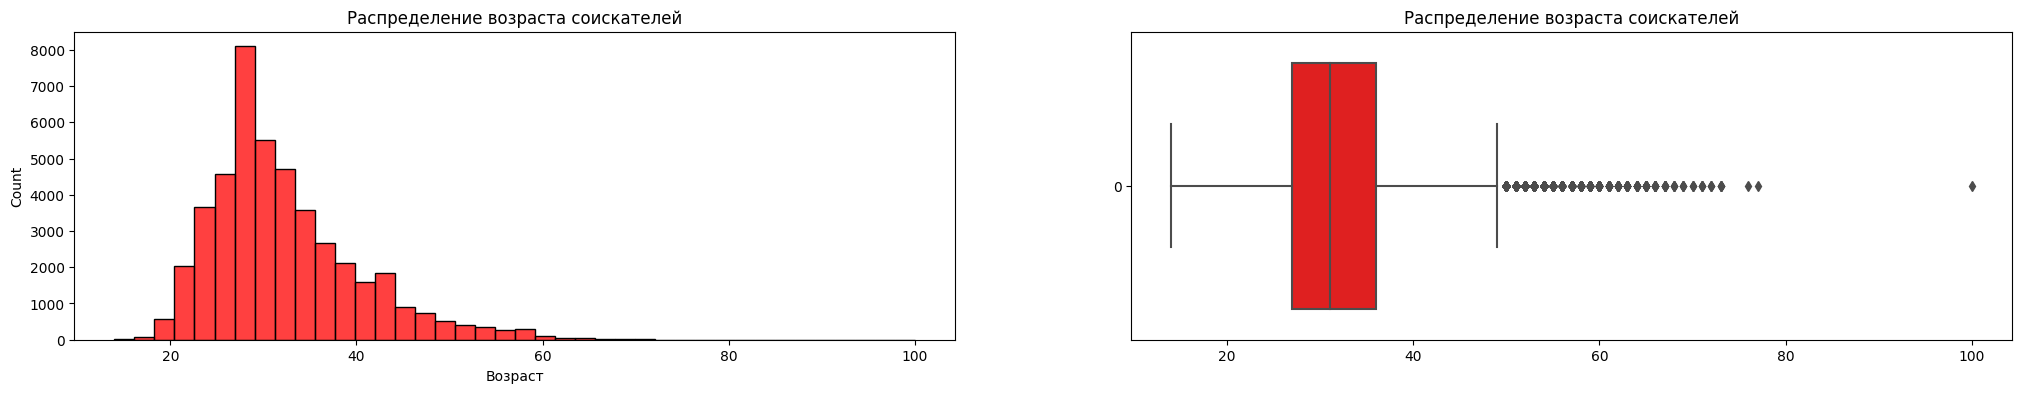

In [13]:
hh_histogram = full_hh_data['Возраст']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))
histplot = sns.histplot(data=hh_histogram, ax=axes[0], bins=40, color='red')
histplot.set_title('Распределение возраста соискателей')
boxplot = sns.boxplot(data=hh_histogram, orient='h' ,ax=axes[1], color='red')
boxplot.set_title('Распределение возраста соискателей')

**Вывод:** Мода распределения возраста равна 30-ти годам. Предельные значения признака от 14 лет до 49 лет. Возраст большинства соискателей находится в интервале от 21 года, до 41 года. К аномалиям данного признака можно отнести предельные значения, а именно максимальный возраст соискателя - 100 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0.5, 1.0, 'Распределение опыта работы')

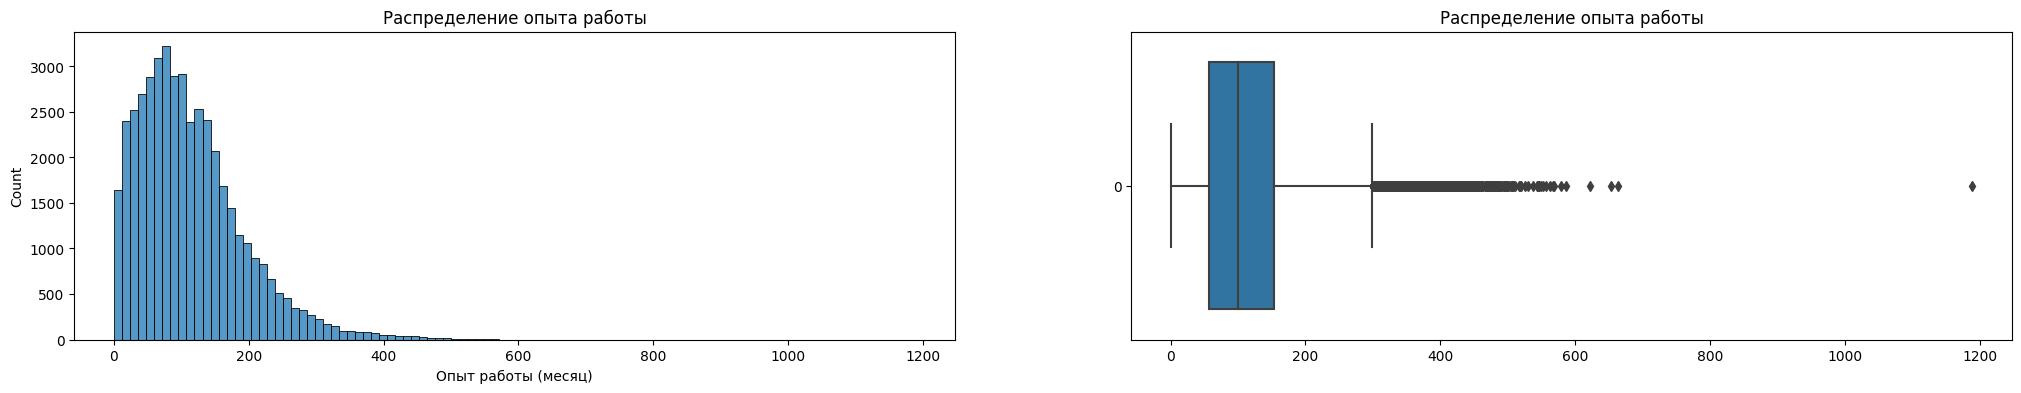

In [14]:
hh_histogram = full_hh_data['Опыт работы (месяц)']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))
histplot = sns.histplot(data=hh_histogram, ax=axes[0], bins=100)
histplot.set_title('Распределение опыта работы')
boxplot = sns.boxplot(data=hh_histogram, orient='h' ,ax=axes[1])
boxplot.set_title('Распределение опыта работы')

**Вывод:** Мода распределения опыта работы (в месяцах) находится в интервале от 80 до 99 месяцев. Предельные значения признака от 1 месяца до 299 месяцев. Опыт работы большинства соискателей находится в примерном интервале от 0 до 199 месяцев. К аномалиям можно отнести максимальные значения опыта работы, а именно вышее 600 месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


0    50000.0
Name: ЗП (руб), dtype: float64

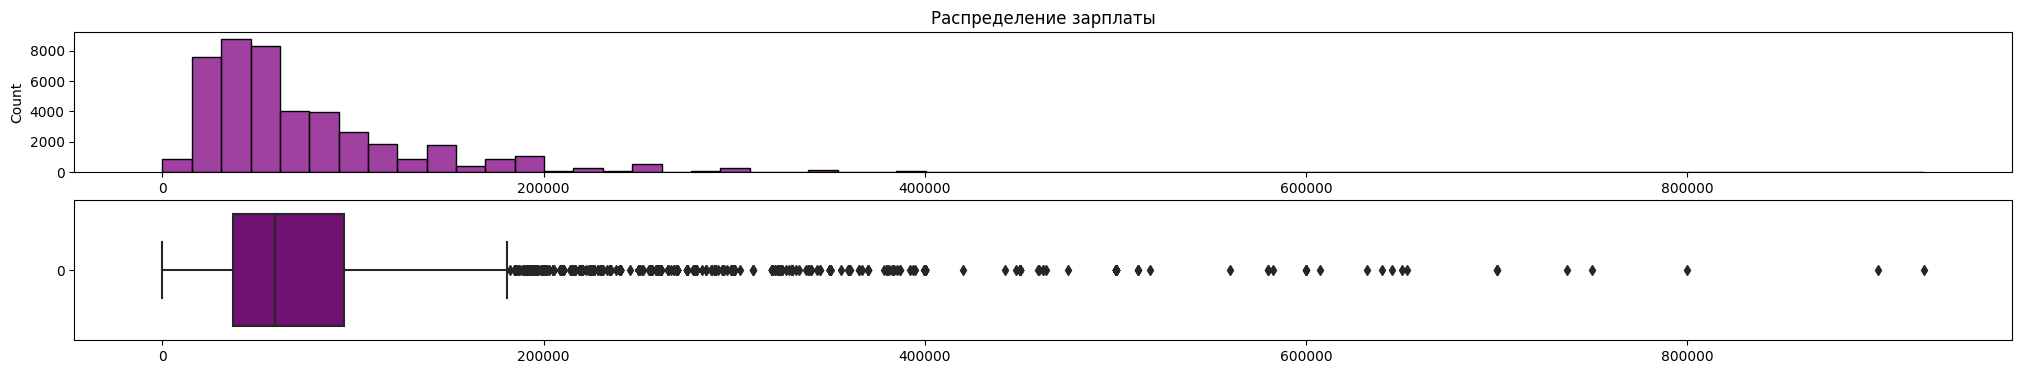

In [15]:
hh_histogram = full_hh_data[full_hh_data['ЗП (руб)'] < 1000000]
hh_histogram = hh_histogram['ЗП (руб)']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 4))
histplot = sns.histplot(data=hh_histogram, ax=axes[0], bins=60, color='purple')
histplot.set_title('Распределение зарплаты')
boxplot = sns.boxplot(data=hh_histogram, orient='h' ,ax=axes[1], color='purple')


display(full_hh_data['ЗП (руб)'].mode())

**Вывод:** Мода распределения зарплаты составляет диапазон от 40 до 60 тыс. руб. Зарплата большинства соискателей находится в диапазоне от 20 до 80 тыс. руб. К аномалиям признака зарплаты отнес бы желаемую зарплату выше 300 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

,Образование,ЗП (руб)
0,Высшее,60000.0
1,Неоконченное высшее,50000.0
2,Среднее,40000.0
3,Среднее специальное,40000.0


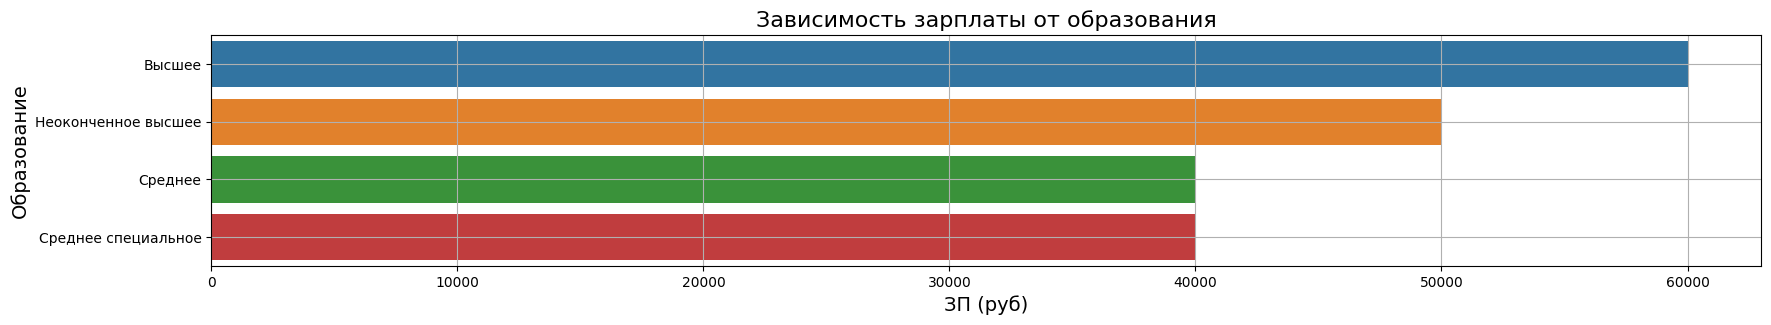

In [16]:
mask = full_hh_data['ЗП (руб)'] < 1000000
box = full_hh_data[mask].groupby(by=['Образование'], as_index=False)['ЗП (руб)'].median()
display(box)

fig, axes = plt.subplots(figsize=(20, 3))

barplot = sns.barplot(
    data=box,
    x='ЗП (руб)',
    y='Образование',
    orient='h'
)
barplot.tick_params(axis='x')
barplot.set_title('Зависимость зарплаты от образования', fontsize=16)
barplot.set_xlabel('ЗП (руб)', fontsize=14)
barplot.set_ylabel('Образование', fontsize=14)
barplot.grid()

**Вывод:** Наибольшая желаемая зарплата наблюдается у соискателей с высшим образованием, затем с неоконченым высшим образованием. Призак образования крайне важен для уровня заплаты, так как рынком труда больше ценятся интелектуальные виды деятельности соискатлей и уровень их квалификации. Рабочие профессии ценятся меньше, хотя имеют место исключения.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

33449    другие
Name: Город, dtype: object

Text(0, 0.5, 'Город')

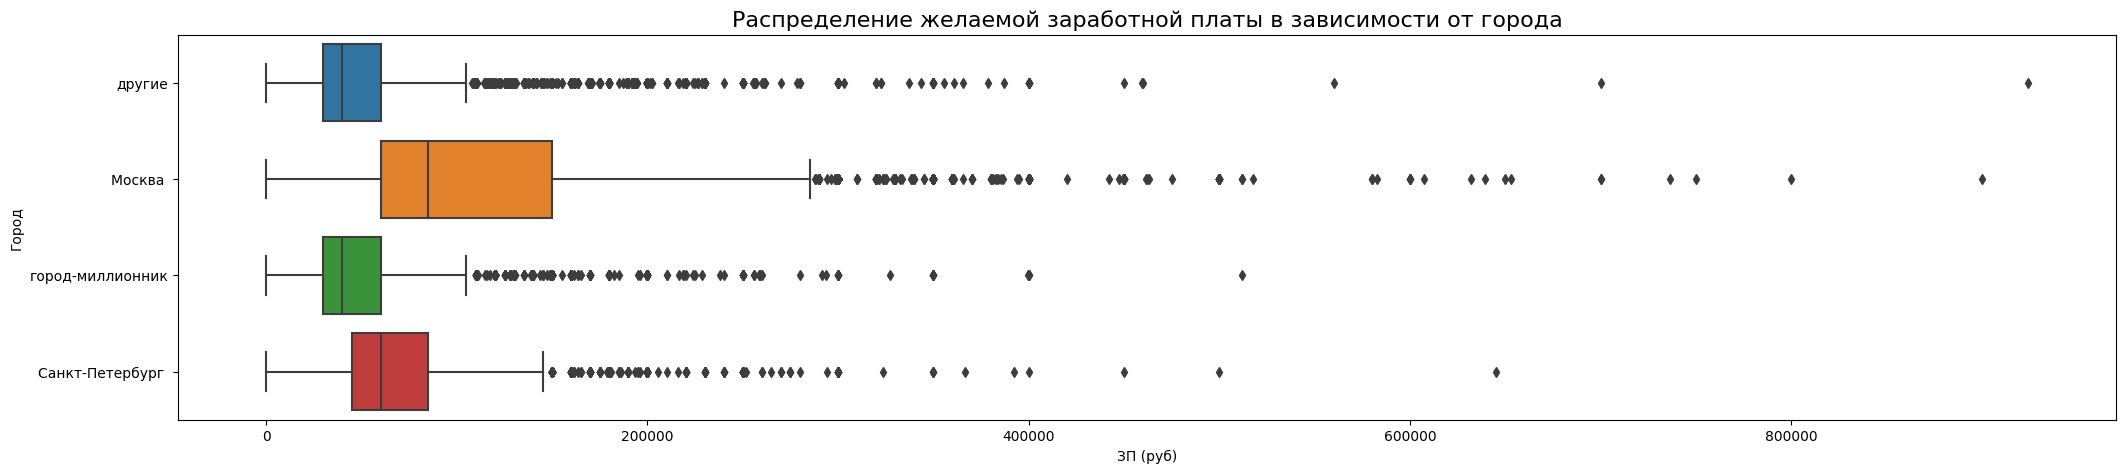

In [17]:
display(full_hh_data.loc[full_hh_data.index[
    full_hh_data['ЗП (руб)'] == full_hh_data[mask]['ЗП (руб)'].max()
], 'Город'])

fig = plt.figure(figsize=(25, 5))
boxplot = sns.boxplot(data=full_hh_data[mask], x='ЗП (руб)', y='Город')
boxplot.set_title('Распределение желаемой заработной платы в зависимости от города', fontsize=16)
boxplot.set_xlabel('ЗП (руб)')
boxplot.set_ylabel('Город')

**Вывод:** Наибольший дапазон желаемой зарплаты наблюдается в Москве, СПб на втором месте, категирии Другие и город-миллионник имеют примерно одинаковый диапазон. Призник города очень важен в вопросах прогнозирования уровня зарплаты. В больших городах сконцентрировано наибольшее количество рабочей силы с разным уровенм опыта и квалификации. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
Не готов к перезду и командировкам,False,False,40000.0
"Не готов к перезду, но готов к командировкам",False,True,60000.0
"Готов к переезду, но не готов к командировкам",True,False,50000.0
"Готов к переезду, готов к командировкам",True,True,65535.0


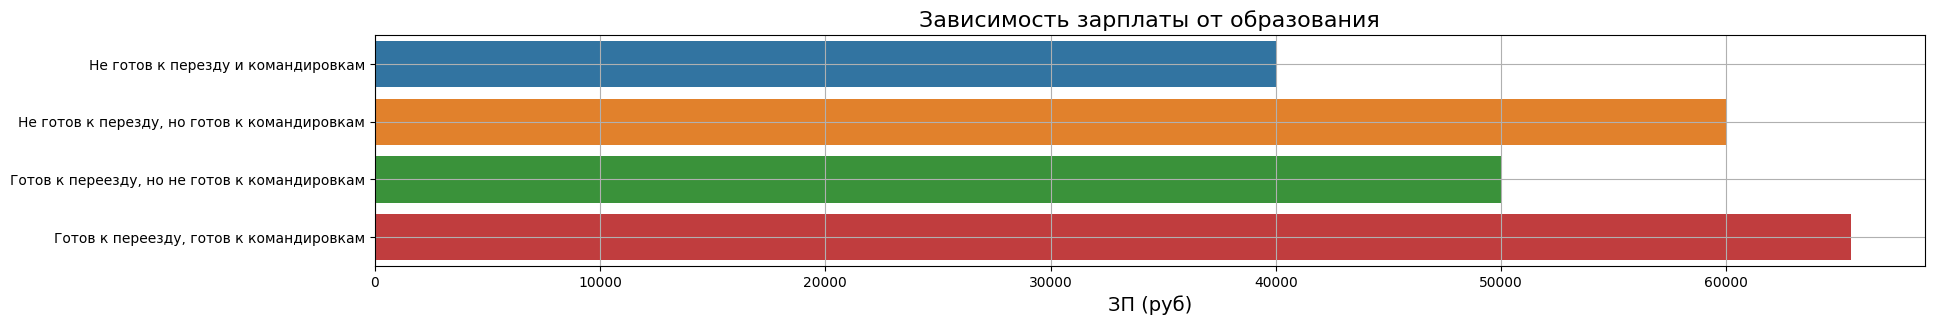

In [18]:
mask = full_hh_data['ЗП (руб)'] < 1000000
box_2 = full_hh_data[mask].groupby(
    by=['Готовность к переезду', 'Готовность к командировкам'], 
    as_index=False)['ЗП (руб)'].median()
box_2.index = ['Не готов к перезду и командировкам', 
               'Не готов к перезду, но готов к командировкам', 
               'Готов к переезду, но не готов к командировкам', 
               'Готов к переезду, готов к командировкам']
display(box_2)

fig, axes = plt.subplots(figsize=(20, 3))

barplot = sns.barplot(
    data=box_2,
    x='ЗП (руб)',
    y=box_2.index,
    orient='h'
)
barplot.tick_params(axis='x')
barplot.set_title('Зависимость зарплаты от образования', fontsize=16)
barplot.set_xlabel('ЗП (руб)', fontsize=14)
barplot.grid()

**Вывод:** Соглано представленному графику призаки готовности к перезду и готовности к командировкам довольно сильно влияют на уровень зарплаты. Работник готовый к командировкам ценится выше чем работник готовый к переезду. Крупный бизнес имеет, как правло, интересы в разных регионах страны и следовательно им требуется отправлять туда сотрудников.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(283.22222222222223, 0.5, 'Возраст')

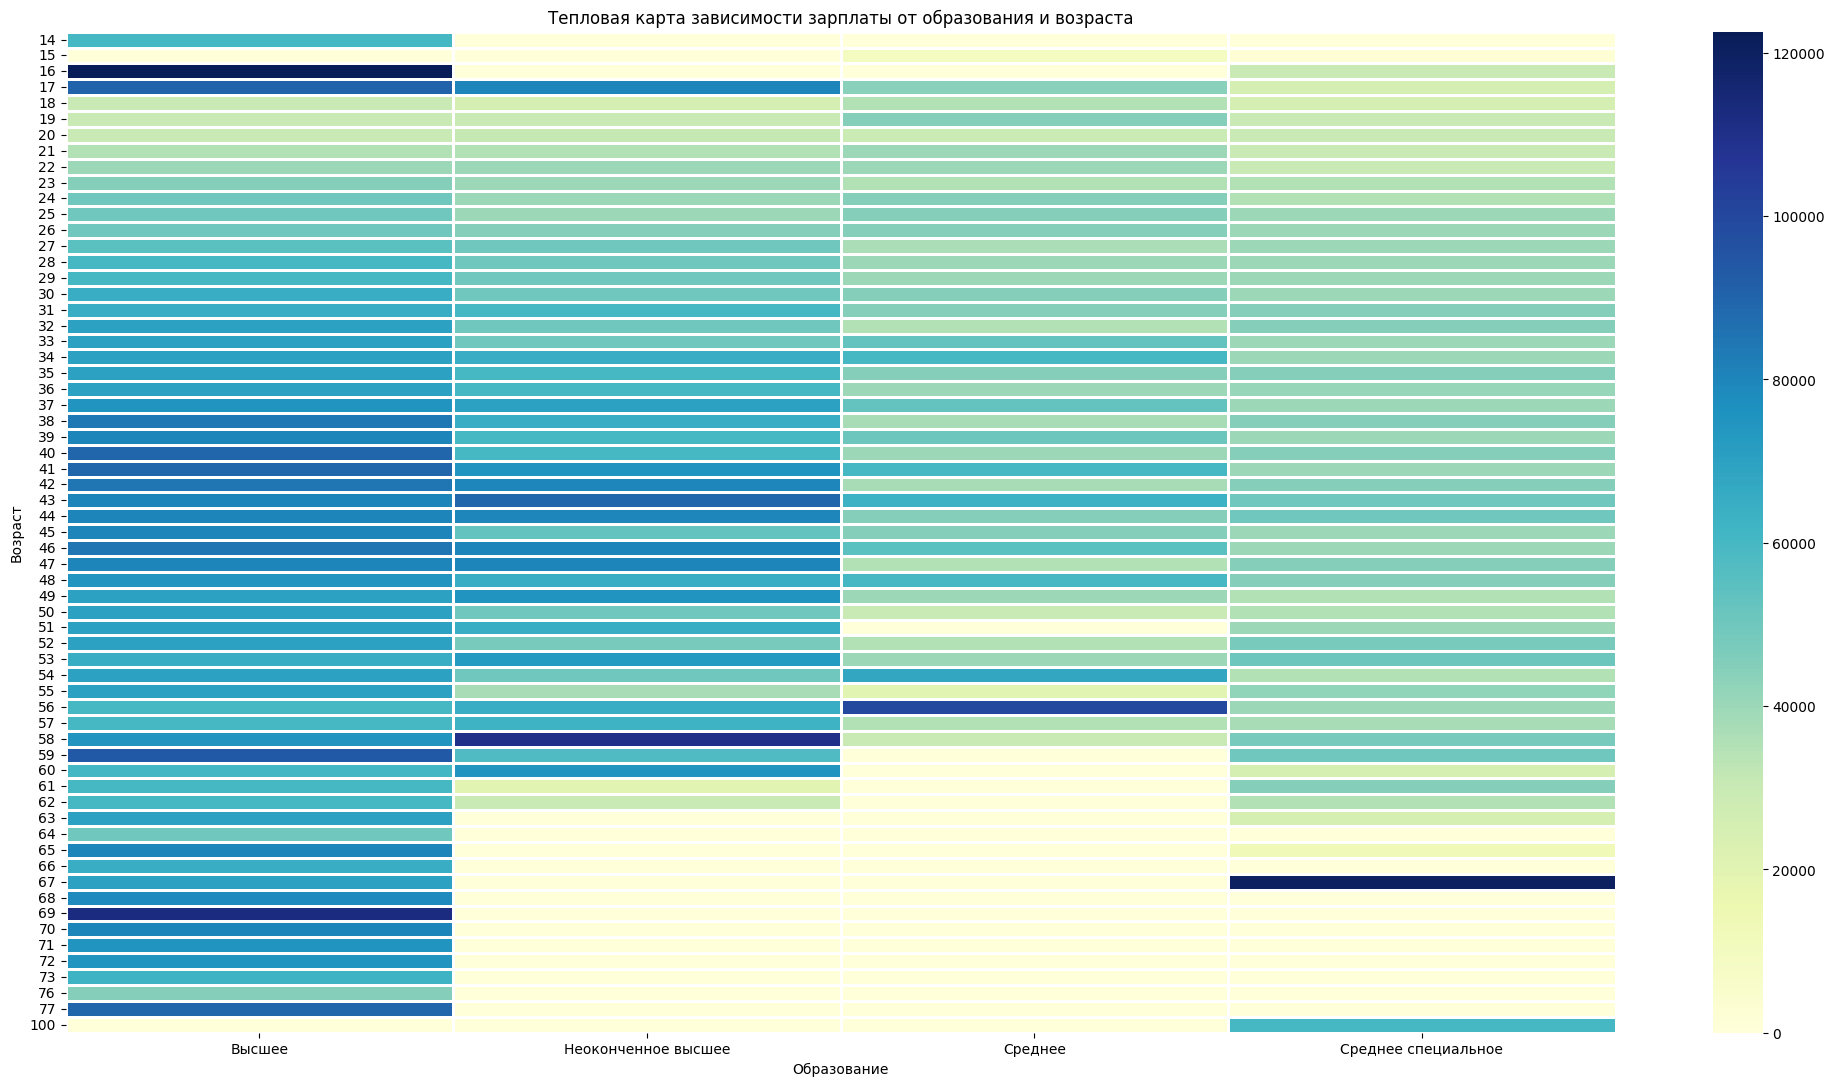

In [19]:
salary_median = full_hh_data.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median',
    fill_value=0
)

fig, axes = plt.subplots(figsize=(25, 13))
heatmap = sns.heatmap(
    salary_median,
    linewidth=1,
    linecolor='w',
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта зависимости зарплаты от образования и возраста')
heatmap.set_xlabel('Образование')
heatmap.set_ylabel('Возраст')


**Вывод:** Тепловая карта зависимости уровня зарплаты от образования и возраста показывает, что наибольшие зарплаты наблюдаются у соискателей высшего образования. Также и тепловой карты видно, что у соискатели с высшим уровнем образования с ворастом не сильно падает востребованность и уровень зарплаты находится на довольно высоком уровне по сравнению с другими категориями. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

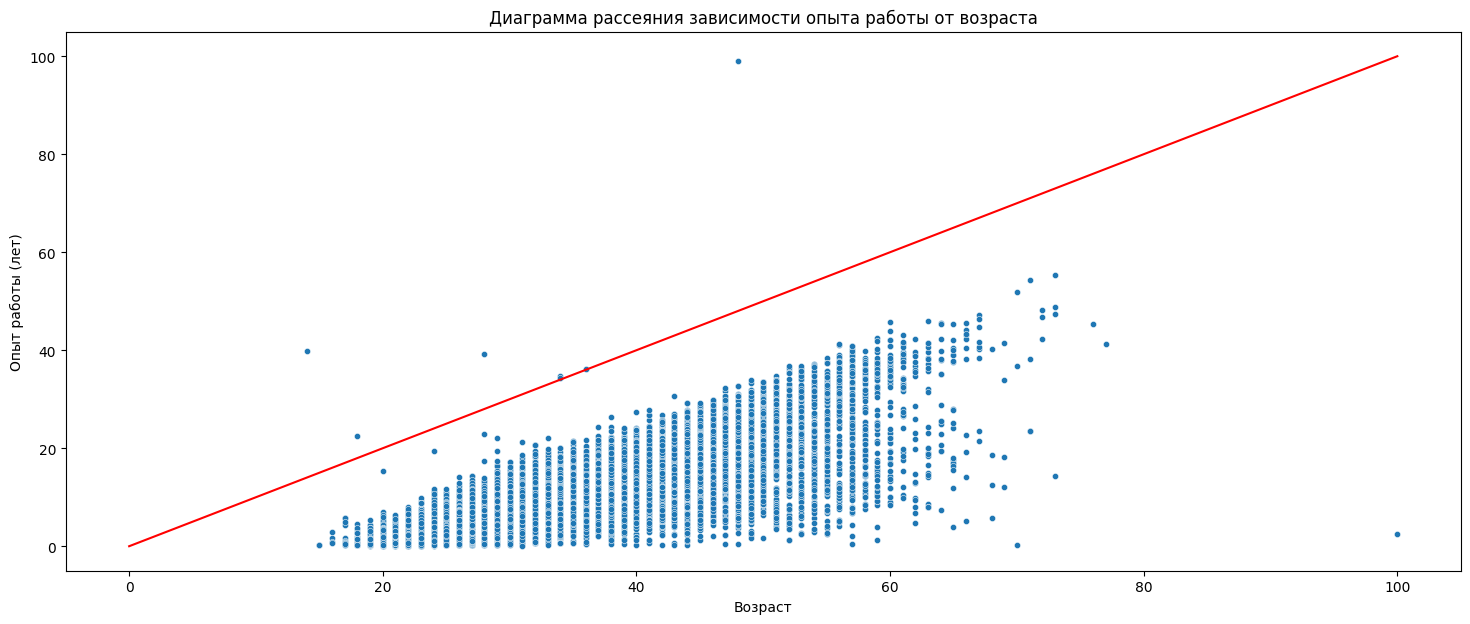

In [20]:
full_hh_data['Опыт работы (лет)'] = round(full_hh_data['Опыт работы (месяц)'] / 12, 2)

fig = plt.figure(figsize=(18, 7))
scatterplot = sns.scatterplot(
    data=full_hh_data,
    x='Возраст',
    y='Опыт работы (лет)',
    s=20,
    sizes=(10, 1)
)
scatterplot.set_title('Диаграмма рассеяния зависимости опыта работы от возраста')
scatterplot.plot([0, 100], [0, 100], color='red') 

**Вывод:** Согласно представленному графику видно, что имеется 7 соискателей, у которых опыт работы больше либо равен их возрасту. Такие показатели говорят о выбросах.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Text(0, 0.5, 'Пол')

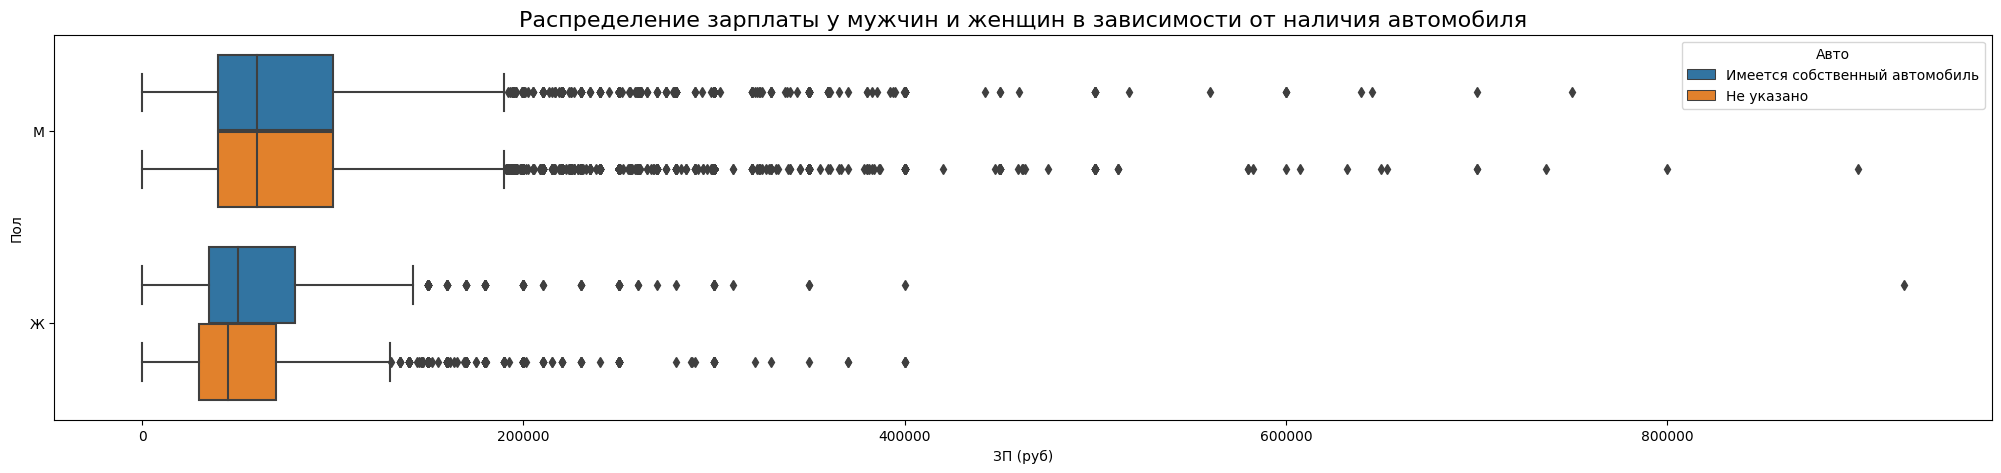

In [21]:
fig = plt.figure(figsize=(25, 5))
boxplot = sns.boxplot(data=full_hh_data[mask], x='ЗП (руб)', y='Пол', hue="Авто")
boxplot.set_title('Распределение зарплаты у мужчин и женщин в зависимости от наличия автомобиля', fontsize=16)
boxplot.set_xlabel('ЗП (руб)')
boxplot.set_ylabel('Пол')

**Вывод:** Представлен график (распределение) зарплаты у мужчин и женщин в зависимости от наличия у них автомобиля. Если допустить, что параметр "Не указано" говорит о том, что у соискателя нет автомобиля, то мосжно сделать следующие выводы:
1. Среди женщин наличие автомобиля существенно сказывается на уровне зарплаты. Наличие автомобиля повышает верхнюю гразицу у большинства сосикателей примерно на 10 тыс. руб. Медианная зарплата различается на 5 тыс руб.
2. Среди мужчин уровень зарплаты в зависимости от наличия атомобиля не отличается. 

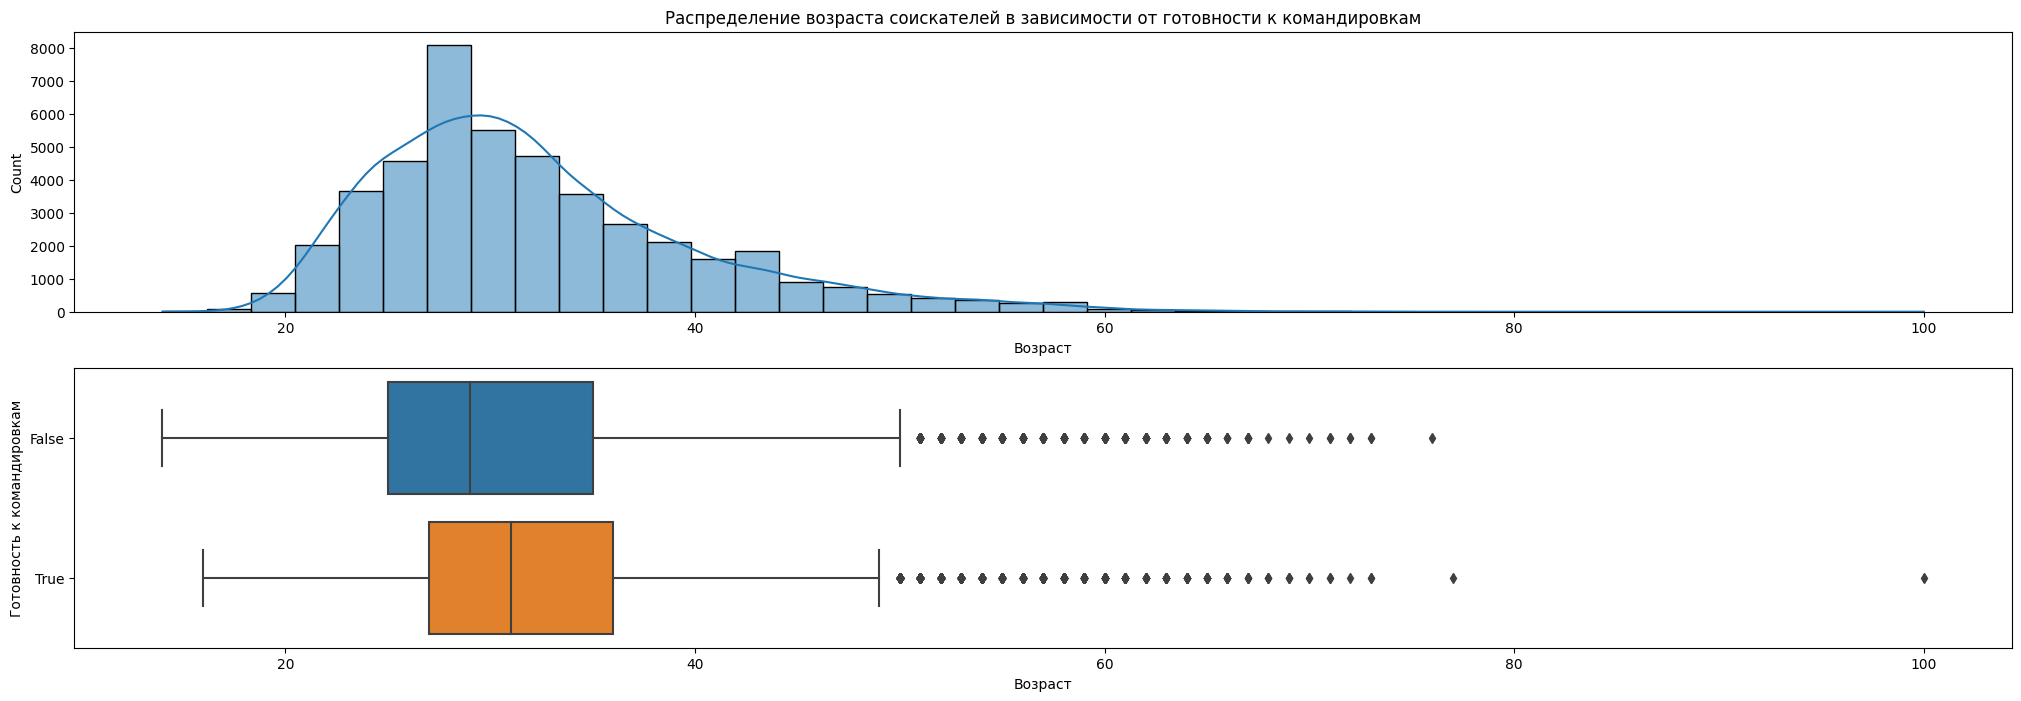

In [22]:
hh_histogram = full_hh_data[mask]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 8))

histplot = sns.histplot(
    data=hh_histogram,
    x='Возраст',
    bins=40,
    kde=True,
    ax=axes[0]
)

histplot.set_title('Распределение возраста соискателей в зависимости от готовности к командировкам')
boxplot = sns.boxplot(data=hh_histogram, orient='h', x='Возраст', y='Готовность к командировкам' ,ax=axes[1])


**Вывод:** Представлен график (распределение) возраста соискателей в зависимости от готовности к командировкам. Из распределения видно, что большинство соискателей готовы к командировкам. Также видно, что медианный возраст тех, кто отказывается от командировок ниже на 2 года чем у тех кто на них согласен.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [23]:
hh_columns = list(full_hh_data.columns)

mask_2 = full_hh_data.duplicated(subset=hh_columns)
hh_dupl = full_hh_data[mask_2]
print('Число полных дубликатов -', hh_dupl.shape[0])
cl_hh_data = full_hh_data.drop_duplicates(subset=hh_columns)

Число полных дубликатов - 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [24]:
for i in hh_columns:
    null_values = cl_hh_data[cl_hh_data[i].isnull() == True].shape[0]
    if null_values > 0:
        print(f"Число пропусков у признака {i} - {null_values}")


Число пропусков у признака Последнее/нынешнее место работы - 1
Число пропусков у признака Последняя/нынешняя должность - 2
Число пропусков у признака Опыт работы (месяц) - 168
Число пропусков у признака Опыт работы (лет) - 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [25]:
cl_hh_data.dropna(how='any', 
                  subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'], 
                  axis=0, 
                  inplace=True)

cl_hh_data =cl_hh_data.fillna({'Опыт работы (месяц)': cl_hh_data['Опыт работы (месяц)'].median()})
print(f"Среднее количество месяцев опыта работы соискателей {round(cl_hh_data['Опыт работы (месяц)'].mean())}")

Среднее количество месяцев опыта работы соискателей 114


C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_10700\3601468693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_hh_data.dropna(how='any',


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
mask_3 = (cl_hh_data['ЗП (руб)'] > 1000000) | (cl_hh_data['ЗП (руб)'] < 1000)
print(f"Число выбросов с зарплатой более 1 млн руб и менее 1 тыс руб - {cl_hh_data[mask_3].shape[0]}")
cl_hh_data.drop(index=cl_hh_data[mask_3].index, inplace=True)


Число выбросов с зарплатой более 1 млн руб и менее 1 тыс руб - 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [27]:
mask_4 = (cl_hh_data['Опыт работы (лет)'] > cl_hh_data['Возраст'])
print(f"Количество найденных выбросов: {cl_hh_data[mask_4].shape[0]}")
cl_hh_data.drop(index=cl_hh_data[mask_4].index, inplace=True)


Количество найденных выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы (месяц),Город,...,частичная занятость,сменный график,проектная работа,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,ЗП (руб),Опыт работы (лет)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,15,М,2.0,Санкт-Петербург,...,True,True,False,True,False,True,False,False,10000.0,0.17
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,15,М,3.0,другие,...,False,False,False,False,False,False,False,False,2000.0,0.25
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,100,М,30.0,Санкт-Петербург,...,True,False,True,True,False,True,True,False,60000.0,2.50


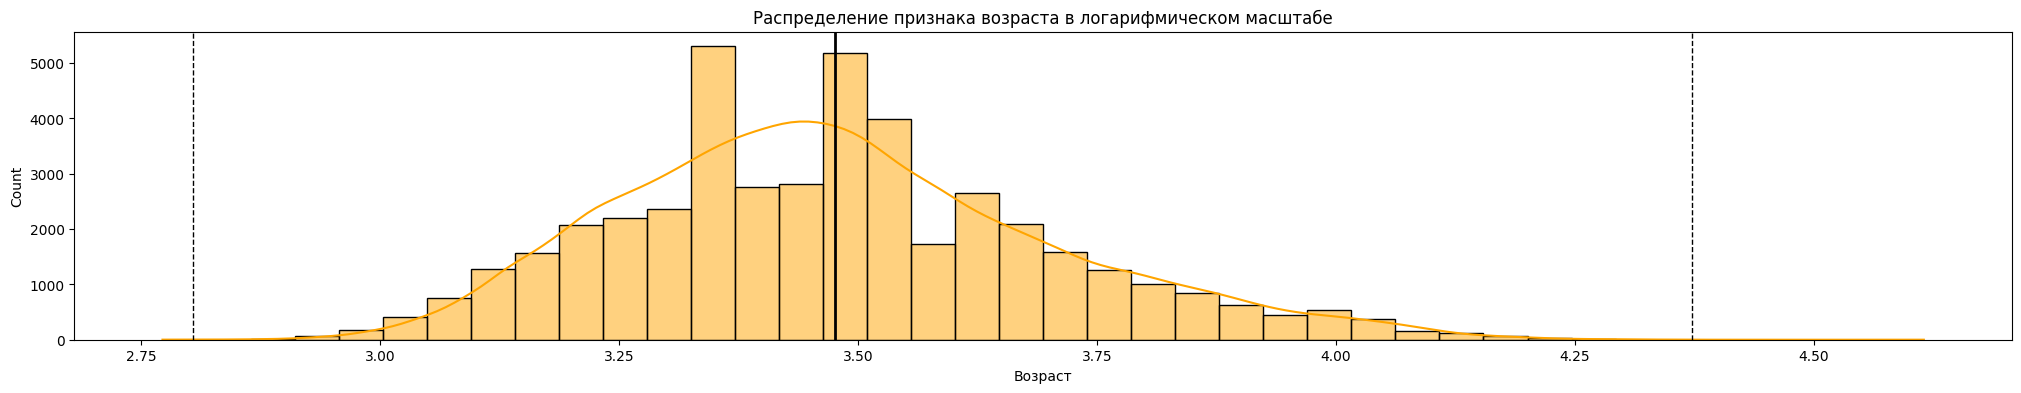

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(25, 4))

log_hh_data_age = np.log(cl_hh_data['Возраст'] + 1)

histplot = sns.histplot(log_hh_data_age, bins=40, ax=ax, color='orange', kde=True,)
histplot.axvline(log_hh_data_age.mean(), color='k', lw=2)
histplot.axvline(log_hh_data_age.mean()+ 4 * log_hh_data_age.std(), color='k', ls='--', lw=1)
histplot.axvline(log_hh_data_age.mean()- 3 * log_hh_data_age.std(), color='k', ls='--', lw=1)
histplot.set_title('Распределение признака возраста в логарифмическом масштабе')

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(cl_hh_data, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
clean_hh_data = cleaned
display(outliers)

##### **Комментарий:** В выбросы попали соискатели, указавшие свой возраст как 15 лет и 100 лет. 